In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [89]:

df = pd.read_excel(r'D:/paper/qb/data/lab_data.xlsx')
df.head()


,River,W,S,Q,U,H,D50,D84,R,qs
0,Bogardi1,0.300,0.0104,0.02747,1.06,0.087,0.0068,0.00816,0.0721,24.1
1,Bogardi1,0.300,0.0141,0.01566,0.92,0.057,0.0068,0.00816,0.0504,6.1
2,Bogardi1,0.823,0.0143,0.02288,0.69,0.040,0.0068,0.00816,0.0389,0.2
3,Bogardi1,0.823,0.0145,0.04978,0.82,0.074,0.0068,0.00816,0.0709,21.9
4,Bogardi1,0.823,0.0153,0.03582,0.78,0.056,0.0068,0.00816,0.0535,1.8


In [90]:
df.describe()

,W,S,Q,U,H,D50,D84,R,qs
count,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000
mean,0.556500,0.022705,0.113250,0.929871,0.096134,0.006579,0.007895,0.083338,2625.613591
std,0.377787,0.038868,0.500064,0.466911,0.109170,0.008250,0.009899,0.094409,10394.566850
min,0.100000,0.000990,0.000500,0.220000,0.009000,0.000300,0.000360,0.008900,0.000000
25%,0.305000,0.003900,0.013880,0.600000,0.043000,0.001600,0.001920,0.039200,3.400000
50%,0.427000,0.009000,0.026050,0.830000,0.069000,0.003300,0.003960,0.060400,49.600000
75%,0.819000,0.016300,0.055950,1.130000,0.116000,0.009000,0.010800,0.099000,361.000000
max,2.000000,0.200000,4.613810,2.880000,1.092000,0.044300,0.053160,0.917300,103700.000000


In [91]:
selected_data = df[df['River'] == 'Recking8']

In [92]:

X=selected_data.loc[:, ['D84','D50','H','U','S','R','Q','W']].values
y=selected_data.loc[:, [ 'qs']].values



In [93]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVR

X_ml=df.loc[:, [ 'H','S','Q','D50','D84','R']].values
y_ml=df.loc[:, [ 'qs']].values

from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler().fit(X_ml)
X1 = scaler1.transform(X_ml)
scaler2 = MinMaxScaler().fit(y_ml)
y1 = scaler2.transform(y_ml)

X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X1, y1, test_size=0.2, random_state=0)
y_train_ml=y_train_ml.ravel()
y_test_ml=y_test_ml.ravel()

svr_rbf = SVR(kernel="rbf", C=2.96770348e+02, gamma='scale', epsilon=0.001)
md=svr_rbf.fit(X_train_ml,y_train_ml)

In [94]:
X_ml_pred=selected_data.loc[:, [ 'H','S','Q','D50','D84','R']].values
X_ml_pred = scaler1.transform(X_ml_pred)
SVR_pred_scale = svr_rbf.predict(X_ml_pred)
SVR_pred_scale=SVR_pred_scale.reshape(-1,1)
qsb_SVR = scaler2.inverse_transform(SVR_pred_scale)

In [95]:
S_t=X[:,4]
D90_t=X[:,0]
D50_t=X[:,1]
h_t=X[:,2]
U_t=X[:,3 ]
R_t=X[:,5 ]
Q_t=X[:,6 ]
W_t=X[:,7 ]
qsb_Measured=y

In [96]:
rhos = 2650
rho = 1000
g=9.81
v=1.79*10**(-6)
s=rhos/rho
p=0.4

In [97]:
import math
def wong_parker(D90,D50,S,R,U,W):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    phi=3.97*(ta_str-0.0495)**(3/2)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [98]:

def Recking_2013(D50,h,U,S,R):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    ta_str_m=0.26*S**0.3
    phi=14*(ta_str**2.5)/(1+(ta_str_m/ta_str)**10)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [99]:
def calculate_sediment_bed_load(D90, D50, h, U,W):
    D90=D90
    D50=D50
    r = 3 * D90
    C = 18 * math.log10(12 * h / r)
    C90 = 18 * math.log10(12 * h / D90)
    mu = (C / C90) ** (3 / 2)
    delta = (rhos - rho) / rho
    tac = rho * g * U ** 2 / C ** 2
    qsb = 5 * D50 * U / C * math.sqrt(g) * math.exp(-0.27 * delta * D50 * rho * g / (mu * tac)) # sediment bed load
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [100]:
def rickenmann(D90,D50,S,R,Q,W,U):
    D_coef=1.05
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    q=Q/W
    qc=0.065*(s-1)**1.67*g**0.5*D50**1.5*S**(-1.12)
    if S<0.03:
        qsb=1.5*(q-qc)*S**1.5
    else:
        qsb=12.6*(D_coef)/((s-1)**1.6)*(q-qc)*S**2

    qsb=qsb*(rhos-rho)*g*(1-p)
    return qsb*1000

In [101]:
def Schoklitsch(D90,D50,S,R,Q,W,U):
    D_coef=1.05
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    q=Q/W
    D40=D50
    qc=0.26*(s-1)**(5/3)*D40**(3/2)/(S**(7/6))
    qsb=2.5/(s)*S**(3/2)*(q-qc)
    qsb=qsb*(rhos-rho)*g*(1-p)
    return qsb*1000

In [102]:
def smart_jaeggi(D90,D50,S,R,U,W):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    Z90=R/D90
    Udustr=2.5*(1-math.exp(-0.05*Z90/(S**0.5)))*0.5*math.log(8.2*Z90)
    fi=0.61
    D30=D50
    ta_str_c=0.05*math.cos(math.atan(S))*(1-S/(math.tan(fi)))
    phi=4*(D90/D30)**0.2*S**0.6*Udustr*ta_str**0.5*(ta_str-ta_str_c)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [103]:
def vanrijn(D90,D50,S,R,U,W):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    u_str=math.sqrt(g)*U/(18*math.log10(4*R/D90))
    D_str=D50*((s-1)*g/(v**2))**1/3
    if D_str<=4:
        alpha=0.24
        beta=-1
    elif D_str > 4 and D_str <= 10:
        alpha=0.14
        beta=-0.64
    elif D_str > 10 and D_str <= 20:
        alpha=0.04
        beta=-0.1
    elif D_str > 20 and D_str <= 150:
        alpha=0.013
        beta=0.29
    else:
        alpha=0.055
        beta=0   
    u_str_c_2=g*(s-1)*D50*(alpha*D_str**beta)
    T=(u_str**2-u_str_c_2)/(u_str_c_2)
    phi=0.053*(T**2.1/(D_str**0.3))
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [104]:
def wong_parker(D90,D50,S,R,U,W):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    phi=3.97*(ta_str-0.0495)**(3/2)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [105]:
def cemenen_larson(D90,D50, h, U,S):
    ta=rho*g*h*S
    u_str=math.sqrt(ta/rho)
    ta_str=ta/(g*(rhos-rho)*D50)
    D_str=((s-1)*g/(v**2))**(1/3)*D50
    ta_str_c=0.3/(1+1.2*D_str)+0.055*(1-math.exp(-0.02*D_str))
    phi=12*ta_str**(3/2)*math.exp(-4.5*ta_str_c/ta_str)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [106]:
def Einstein_Brown(D50,h,U,S):
    C=U/(math.sqrt(h*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    if ta_str>0.18:
        ft_str=40*ta_str**3
    else:
        ft_str=2.15*math.exp(-0.391/ta_str)

    phi=(math.sqrt(2/3+36*v**2/(g*(s-1)*D50**3)))*ft_str
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)

    return qsb*1000

In [107]:
def engelund_hansen(D50,h,U,S,R):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    f=2*g*R*S/U**2
    phi=0.1*ta_str**(5/2)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [108]:
def parker(D50,h,U,S,R):
    C=U/(math.sqrt(R*S))
    ta=rho*g*U**2/C**2
    ta_str=ta/(g*(rhos-rho)*D50)
    phi=11.2*((ta_str-0.03)**4.5)/(ta_str**3)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*1000

In [109]:
qsb_pred_lec=np.zeros([len(D50_t),1])
qsb_pred_wong_parker=np.zeros([len(D50_t),1])
qsb_pred_Recking=np.zeros([len(D50_t),1])
qsb_pred_rickenmann=np.zeros([len(D50_t),1])
qsb_pred_Schoklitsch=np.zeros([len(D50_t),1])
qsb_pred_smart_jaeggi=np.zeros([len(D50_t),1])
qsb_pred_vanrijn=np.zeros([len(D50_t),1])
qsb_pred_cemenen_larson=np.zeros([len(D50_t),1])
qsb_pred_Einstein_Brown=np.zeros([len(D50_t),1])
qsb_pred_engelund_hansen=np.zeros([len(D50_t),1])
qsb_pred_parker=np.zeros([len(D50_t),1])

In [110]:

for i in range(len(D50_t)):
    qsb_pred_lec[i]=calculate_sediment_bed_load(D90_t[i], D50_t[i], h_t[i], U_t[i],W_t[i])
    qsb_pred_wong_parker[i]=wong_parker(D90_t[i],D50_t[i],S_t[i],R_t[i],U_t[i],W_t[i])
    qsb_pred_Recking[i]=Recking_2013(D50_t[i], h_t[i], U_t[i],S_t[i],R_t[i])
    qsb_pred_rickenmann[i]=rickenmann(D90_t[i],D50_t[i],S_t[i],R_t[i],Q_t[i],W_t[i],U_t[i])
    qsb_pred_Schoklitsch[i]=Schoklitsch(D90_t[i],D50_t[i],S_t[i],R_t[i],Q_t[i],W_t[i],U_t[i])
    qsb_pred_smart_jaeggi[i]=smart_jaeggi(D90_t[i],D50_t[i],S_t[i],R_t[i],U_t[i],W_t[i])
    qsb_pred_vanrijn[i]=vanrijn(D90_t[i],D50_t[i],S_t[i],R_t[i],U_t[i],W_t[i])
    qsb_pred_cemenen_larson[i]=cemenen_larson(D90_t[i], D50_t[i], h_t[i], U_t[i],S_t[i])
    qsb_pred_Einstein_Brown[i]=Einstein_Brown(D50_t[i], h_t[i], U_t[i],S_t[i])
    qsb_pred_engelund_hansen[i]=engelund_hansen(D50_t[i], h_t[i], U_t[i],S_t[i],R_t[i])
    qsb_pred_parker[i]=parker(D50_t[i], h_t[i], U_t[i],S_t[i],R_t[i])
    
    

In [111]:
# Converting nan values to 0 for all qsb_pred variables
qsb_pred_lec = np.nan_to_num(qsb_pred_lec, nan=0)
qsb_pred_wong_parker = np.nan_to_num(qsb_pred_wong_parker, nan=0)
qsb_pred_Recking = np.nan_to_num(qsb_pred_Recking, nan=0)
qsb_pred_rickenmann = np.nan_to_num(qsb_pred_rickenmann, nan=0)
qsb_pred_Schoklitsch = np.nan_to_num(qsb_pred_Schoklitsch, nan=0)
qsb_pred_smart_jaeggi = np.nan_to_num(qsb_pred_smart_jaeggi, nan=0)
qsb_pred_vanrijn = np.nan_to_num(qsb_pred_vanrijn, nan=0)
qsb_pred_cemenen_larson = np.nan_to_num(qsb_pred_cemenen_larson, nan=0)
qsb_pred_Einstein_Brown = np.nan_to_num(qsb_pred_Einstein_Brown, nan=0)
qsb_pred_engelund_hansen = np.nan_to_num(qsb_pred_engelund_hansen, nan=0)
qsb_pred_parker = np.nan_to_num(qsb_pred_parker, nan=0)

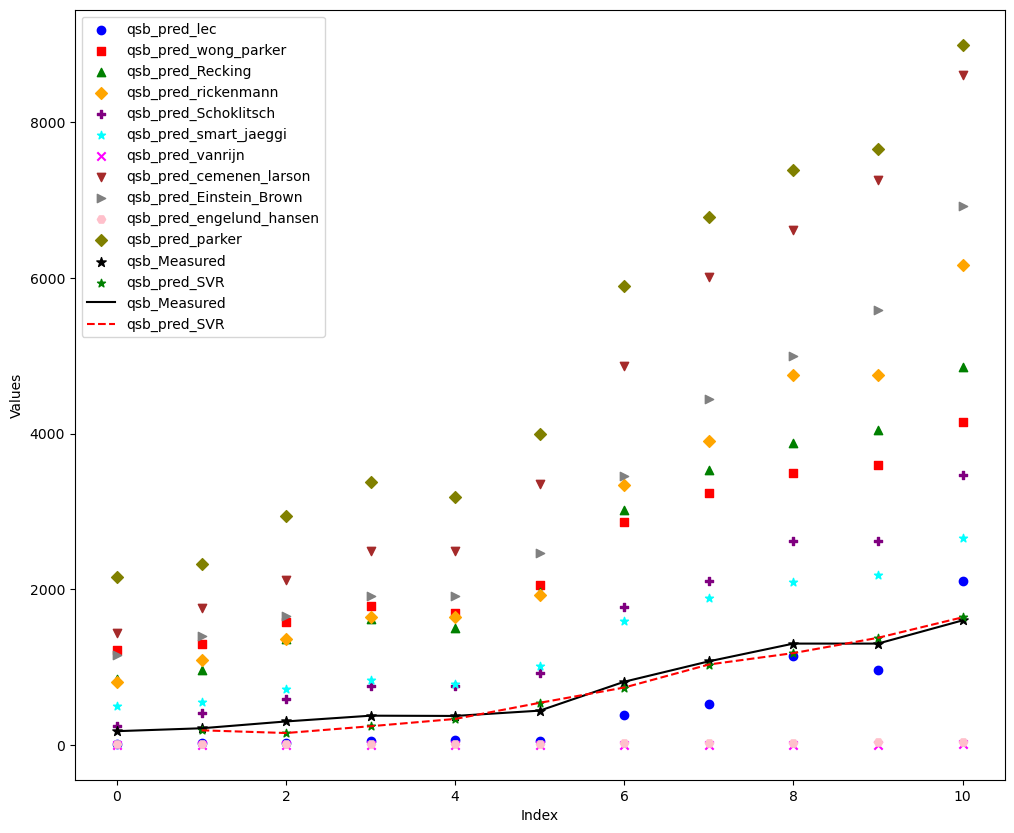

In [112]:

upper_range = 40000000
lower_range = 0

# Set the figure size for a larger plot window
plt.figure(figsize=(12, 10))  # Adjust the values as needed for your desired size

# Creating the scatter plots with values in the specified range
plt.scatter(range(len(D90_t)), np.where((qsb_pred_lec >= lower_range) & (qsb_pred_lec <= upper_range), qsb_pred_lec, np.nan), c='blue', marker='o', label='qsb_pred_lec')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_wong_parker >= lower_range) & (qsb_pred_wong_parker <= upper_range), qsb_pred_wong_parker, np.nan), c='red', marker='s', label='qsb_pred_wong_parker')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_Recking >= lower_range) & (qsb_pred_Recking <= upper_range), qsb_pred_Recking, np.nan), c='green', marker='^', label='qsb_pred_Recking')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_rickenmann >= lower_range) & (qsb_pred_rickenmann <= upper_range), qsb_pred_rickenmann, np.nan), c='orange', marker='D', label='qsb_pred_rickenmann')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_Schoklitsch >= lower_range) & (qsb_pred_Schoklitsch <= upper_range), qsb_pred_Schoklitsch, np.nan), c='purple', marker='P', label='qsb_pred_Schoklitsch')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_smart_jaeggi >= lower_range) & (qsb_pred_smart_jaeggi <= upper_range), qsb_pred_smart_jaeggi, np.nan), c='cyan', marker='*', label='qsb_pred_smart_jaeggi')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_vanrijn >= lower_range) & (qsb_pred_vanrijn <= upper_range), qsb_pred_vanrijn, np.nan), c='magenta', marker='x', label='qsb_pred_vanrijn')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_cemenen_larson >= lower_range) & (qsb_pred_cemenen_larson <= upper_range), qsb_pred_cemenen_larson, np.nan), c='brown', marker='v', label='qsb_pred_cemenen_larson')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_Einstein_Brown >= lower_range) & (qsb_pred_Einstein_Brown <= upper_range), qsb_pred_Einstein_Brown, np.nan), c='gray', marker='>', label='qsb_pred_Einstein_Brown')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_engelund_hansen >= lower_range) & (qsb_pred_engelund_hansen <= upper_range), qsb_pred_engelund_hansen, np.nan), c='pink', marker='H', label='qsb_pred_engelund_hansen')
plt.scatter(range(len(D90_t)), np.where((qsb_pred_parker >= lower_range)& (qsb_pred_parker <= upper_range), qsb_pred_parker, np.nan), c='olive', marker='D', label='qsb_pred_parker')
plt.scatter(range(len(D90_t)), np.where((qsb_Measured >= lower_range) & (qsb_Measured <= upper_range), qsb_Measured, np.nan), c='black', marker='*', label='qsb_Measured', s=50)  # Increase the marker size (s) to 50 or as desired
plt.scatter(range(len(D90_t)), np.where((qsb_SVR >= lower_range) & (qsb_SVR <= upper_range), qsb_SVR, np.nan), c='green', marker='*', label='qsb_pred_SVR')
# Creating a line plot for qsb_Measured
plt.plot(range(len(D90_t)), np.where((qsb_Measured >= lower_range) & (qsb_Measured <= upper_range), qsb_Measured, np.nan), c='black', label='qsb_Measured')
plt.plot(range(len(D90_t)), np.where((qsb_SVR >= lower_range) & (qsb_SVR <= upper_range), qsb_SVR, np.nan), color='red', linestyle='--', label='qsb_pred_SVR')

# Adding labels and legends
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

# Displaying the plot
plt.show()


In [113]:

# Create a new DataFrame to store the river locations
river_locations_df = pd.DataFrame(columns=['name', 'locations'])

# Iterate over each unique river name
for river_name in df['River'].unique():
    # Find the indices where the river name occurs in the dataset
    indices = df.index[df['River'] == river_name].tolist()
    
    # Create a new row with the river name and its locations
    row = pd.DataFrame([[river_name, indices]], columns=['name', 'locations'])
    
    # Concatenate the row with the river_locations_df DataFrame
    river_locations_df = pd.concat([river_locations_df, row], ignore_index=True)

river_locations_df.head()

,name,locations
0,Bogardi1,"[0, 1, 2, 3, 4, 5, 6, 7]"
1,Bogardi2,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17]"
2,Bogardi3,"[18, 19, 20, 21, 22, 23, 24]"
3,Bogardi4,"[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]"
4,Bogardi5,"[36, 37, 38, 39, 40, 41, 42, 43]"


In [114]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

def error(y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    return r_squared,rmse,mae,mse

